In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import genlaguerre, gamma
from scipy.interpolate import interp1d
from mpmath import *
mp.pretty = True
###########################
# Setup Plotting Defaults #
###########################
# For more options see https://matplotlib.org/users/customizing.html

# Commands for high detail plots (much larger in file size though)
#mpl.rcParams['agg.path.chunksize'] = 1000
#mpl.rcParams['savefig.dpi'] = 1000

# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.antialiased'] = True
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1
mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid', 'navy', 'brown'])


# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Helvetica'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['axes.labelpad'] = 10.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 12
mpl.rcParams['xtick.minor.size'] = 7
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 12
mpl.rcParams['ytick.minor.size'] = 7
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True

# Legend
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 0.8
#mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation


#plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \boldmath'

plt.rcParams['text.latex.preamble'] = r'\usepackage{mathpazo}'

        
# Figure size
#mpl.rcParams['figure.figsize'] = 10, 6

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1

GNew = 7484169213.942707 # 1 / (M_SM * eV)
hbar = 6.58e-16
ckm = 2.998e5

Text(0, 0.5, '$\\gamma_{\\rm R} / \\gamma_{\\rm NR}$')

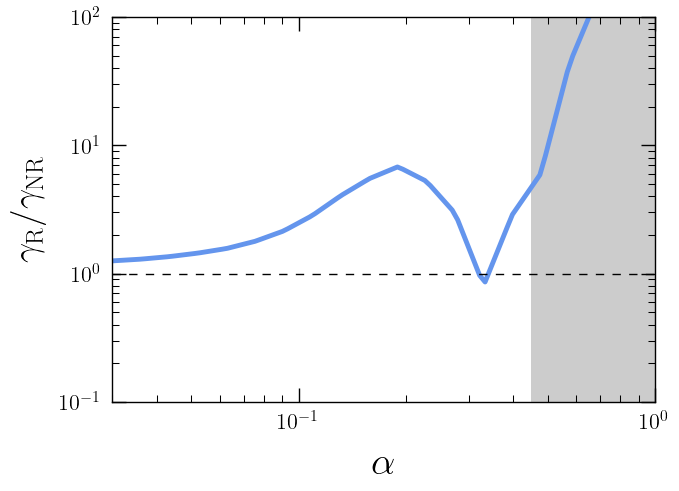

In [77]:
## 
fig, axs = plt.subplots(1, figsize=(7,5))

loadIn = np.loadtxt("211_211_322_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)


apts = np.logspace(np.log10(0.03), np.log10(1), 100)
ypts = 4.3e-7 * apts**11 * np.sqrt(1 + np.sqrt(1 - 0.9**2))


newP = 10**intF(np.log10(apts))

# plt.plot(apts, (newP - ypts) /  ypts, lw=3.5)
plt.plot(apts, (newP ) /  ypts, lw=3.5)
plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))
# plt.plot(apts, ypts, lw=1.5, c="k", ls="--")

axs.axvspan(0.45, 2, facecolor="k", alpha=0.2)

# plt.yscale("log")
plt.xscale("log")
plt.yscale("log")
plt.xlim([0.03,1])
plt.ylim([0.1, 1e2])
plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

Text(0, 0.5, '$\\gamma_{\\rm R} / \\gamma_{\\rm NR}$')

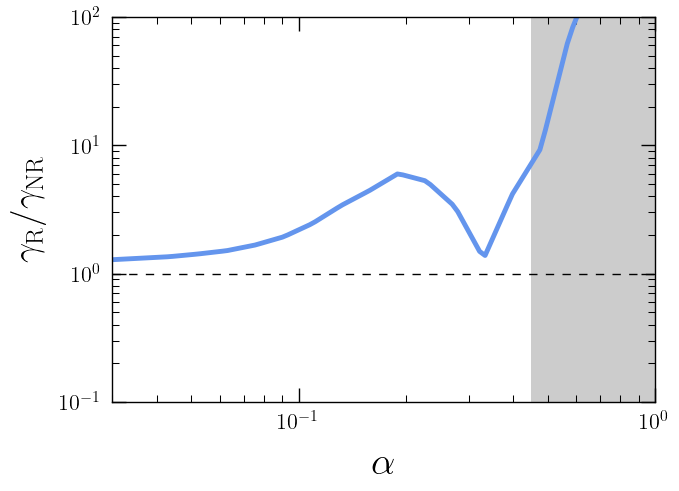

In [76]:
## 
fig, axs = plt.subplots(1, figsize=(7,5))

loadIn = np.loadtxt("211_211_422_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)


apts = np.logspace(np.log10(0.03), np.log10(1), 100)
ypts = 1.5e-7 * apts**11 * np.sqrt(1 + np.sqrt(1 - 0.9**2))

newP = 10**intF(np.log10(apts))

# plt.plot(apts, (newP - ypts) /  ypts, lw=3.5)
plt.plot(apts, (newP ) /  ypts, lw=3.5)
plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))
# plt.plot(apts, ypts, lw=1.5, c="k", ls="--")


axs.axvspan(0.45, 2, facecolor="k", alpha=0.2)

plt.xscale("log")
plt.yscale("log")
plt.xlim([0.03,1])
plt.ylim([0.1, 1e2])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

Text(0, 0.5, '$\\gamma_{\\rm R} / \\gamma_{\\rm NR}$')

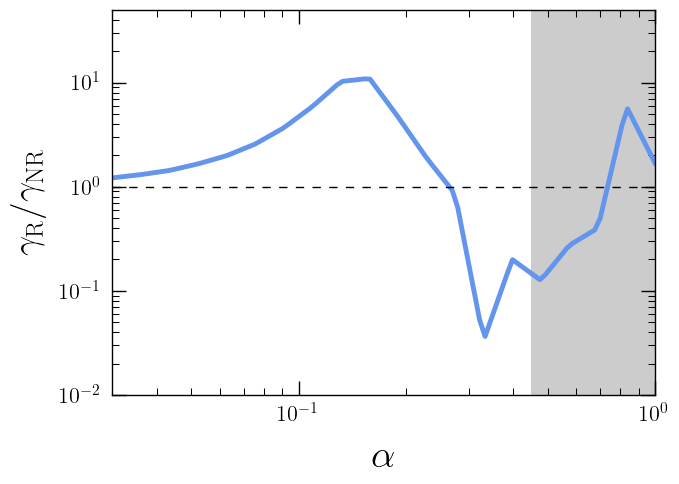

In [74]:
## 
fig, axs = plt.subplots(1, figsize=(7,5))

loadIn = np.loadtxt("211_322_433_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)


apts = np.logspace(np.log10(0.03), np.log10(1), 100)
ypts = 9.1e-8 * apts**11 * (1 + np.sqrt(1 - 0.9**2))

newP = 10**intF(np.log10(apts))

# plt.plot(apts, (newP - ypts) /  ypts, lw=3.5)
plt.plot(apts, (newP ) /  ypts, lw=3.5)
plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))
# plt.plot(apts, ypts, lw=1.5, c="k", ls="--")

axs.axvspan(0.45, 2, facecolor="k", alpha=0.2)

plt.xscale("log")
plt.yscale("log")
plt.xlim([0.03,1])
plt.ylim([0.01, 50])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

Text(0, 0.5, '$\\gamma_{\\rm R} / \\gamma_{\\rm NR}$')

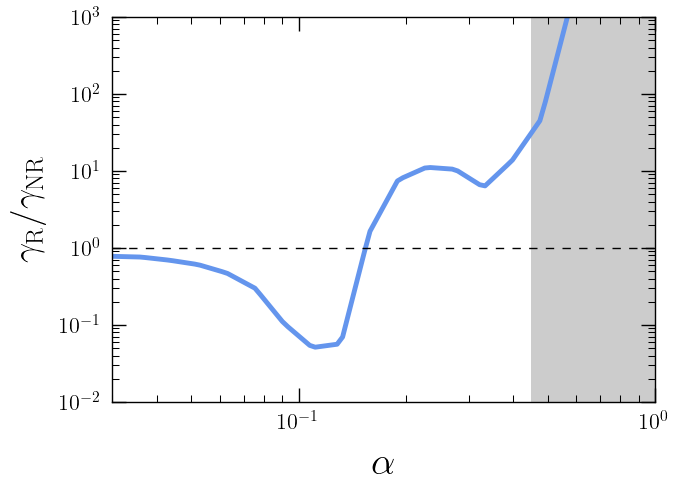

In [73]:
## 
fig, axs = plt.subplots(1, figsize=(7,5))

loadIn = np.loadtxt("211_411_322_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)


apts = np.logspace(np.log10(0.03), np.log10(1), 100)
ypts = 2.5e-8 * apts**11 * (1 + np.sqrt(1 - 0.9**2))

newP = 10**intF(np.log10(apts))

# plt.plot(apts, (newP - ypts) /  ypts, lw=3.5)
plt.plot(apts, (newP ) /  ypts, lw=3.5)
plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))
# plt.plot(apts, ypts, lw=1.5, c="k", ls="--")

axs.axvspan(0.45, 2, facecolor="k", alpha=0.2)
plt.xscale("log")
plt.yscale("log")
plt.xlim([0.03,1])
plt.ylim([0.01, 1e3])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

Text(0, 0.5, '$\\gamma_{\\rm R} / \\gamma_{\\rm NR}$')

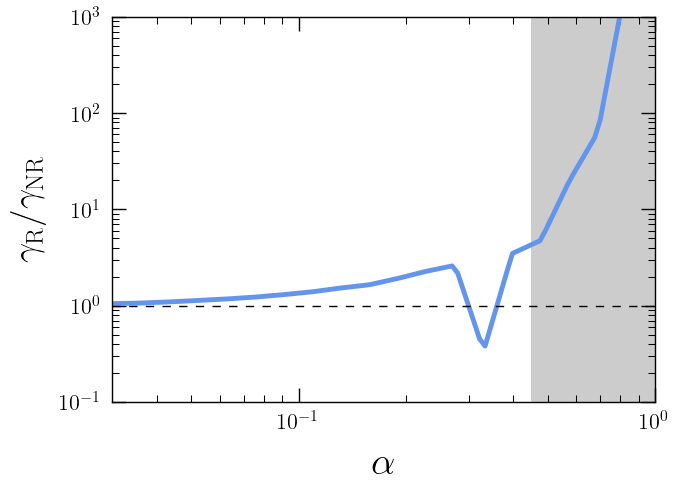

In [71]:
## 
fig, axs = plt.subplots(1, figsize=(7,5))

loadIn = np.loadtxt("211_422_433_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)


apts = np.logspace(np.log10(0.03), np.log10(1), 100)
# ypts = 1.1e-9 * apts**7 * (1 + np.sqrt(1 - 0.9**2)) ### I DISAGREE!!
ypts = 7.83e-11 * apts**7 * (1 + np.sqrt(1 - 0.9**2)) 

newP = 10**intF(np.log10(apts))

# plt.plot(apts, (newP - ypts) /  ypts, lw=3.5)
plt.plot(apts, (newP ) /  ypts, lw=3.5)
plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))
# plt.plot(apts, ypts, lw=1.5, c="k", ls="--")
axs.axvspan(0.45, 2, facecolor="k", alpha=0.2)

plt.xscale("log")
plt.yscale("log")
plt.xlim([0.03,1])
plt.ylim([0.1, 1e3])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

Text(0, 0.5, '$\\gamma_{\\rm R} / \\gamma_{\\rm NR}$')

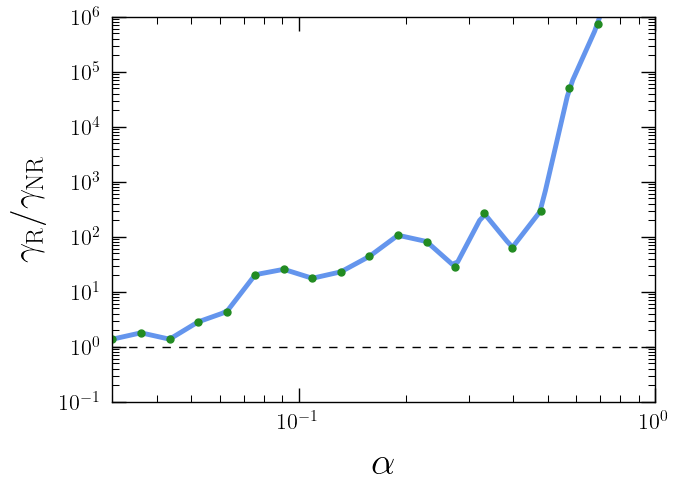

In [87]:
## 
fig, axs = plt.subplots(1, figsize=(7,5))

loadIn = np.loadtxt("411_411_322_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)


apts = np.logspace(np.log10(0.03), np.log10(1), 100)
# ypts = 9.8e-11 * apts**11 * (1 + np.sqrt(1 - 0.9**2))
# I get something different...
ypts = 1.7e-11 * apts**11 * (1 + np.sqrt(1 - 0.9**2))

newP = 10**intF(np.log10(apts))

# plt.plot(apts, (newP - ypts) /  ypts, lw=3.5)
plt.plot(apts, (newP ) /  ypts, lw=3.5)
plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))
# plt.plot(apts, ypts, lw=1.5, c="k", ls="--")

# plt.plot(loadIn[:,0], loadIn[:,1] / ( 2.2e-11 * loadIn[:,0]**11 * (1 + np.sqrt(1 - 0.9**2))), "o", ms=5)


plt.xscale("log")
plt.yscale("log")
plt.xlim([0.03,1])
plt.ylim([0.1, 1e6])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

Text(0, 0.5, '$\\gamma_{\\rm R} / \\gamma_{\\rm NR}$')

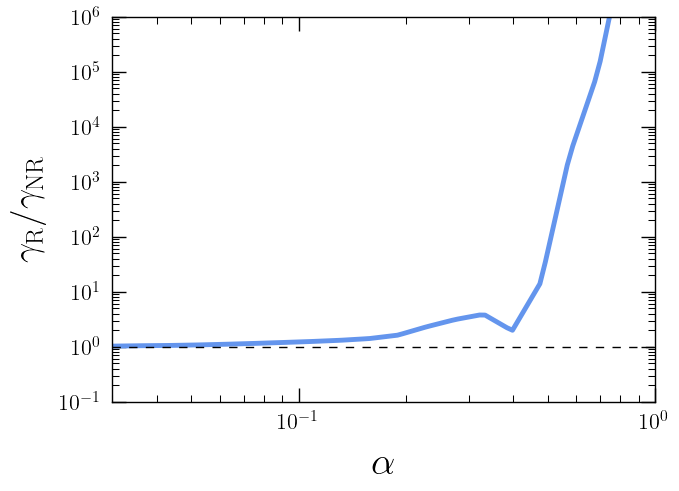

In [65]:
## 
fig, axs = plt.subplots(1, figsize=(7,5))

loadIn = np.loadtxt("411_411_422_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)


apts = np.logspace(np.log10(0.03), np.log10(1), 100)
ypts = 2.2e-11 * apts**7 * (1 + np.sqrt(1 - 0.9**2))

newP = 10**intF(np.log10(apts))

# plt.plot(apts, (newP - ypts) /  ypts, lw=3.5)
plt.plot(apts, (newP ) /  ypts, lw=3.5)
plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))
# plt.plot(apts, ypts, lw=1.5, c="k", ls="--")



plt.xscale("log")
plt.yscale("log")
plt.xlim([0.03,1])
# plt.ylim([0.0, 1000])
plt.ylim([.1, 1e6])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

Text(0, 0.5, '$\\gamma_{\\rm R} / \\gamma_{\\rm NR}$')

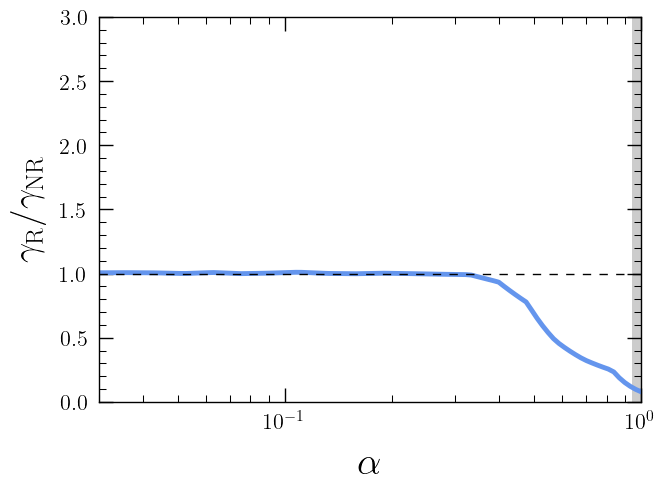

In [38]:
## 
fig, axs = plt.subplots(1, figsize=(7,5))

# loadIn = np.loadtxt("322_322_211_Inf_2.dat")
loadIn = np.loadtxt("322_322_211_Inf_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)


apts = np.logspace(np.log10(0.03), np.log10(1), 100)
ypts = 1.15e-8 * apts**8

newP = 10**intF(np.log10(apts))

# plt.plot(apts, (newP - ypts) /  ypts, lw=3.5)
plt.plot(apts, (newP ) /  ypts, lw=3.5)
plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))
# plt.plot(apts, ypts, lw=1.5, c="k", ls="--")

axs.axvspan(0.94, 2, facecolor="k", alpha=0.2)

plt.xscale("log")
plt.xlim([0.03,1])
plt.ylim([0.0, 3])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

In [35]:
1.1e-8 * 0.15**8

2.8191796874999987e-15

Text(0, 0.5, '$\\gamma_{\\rm R} / \\gamma_{\\rm NR}$')

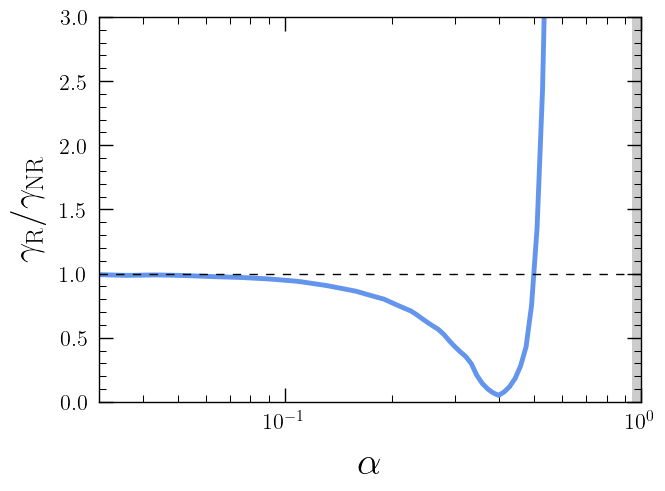

In [39]:
## 
fig, axs = plt.subplots(1, figsize=(7,5))

#loadIn = np.loadtxt("322_411_211_Inf_2.dat")
loadIn = np.loadtxt("322_411_211_Inf_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)


apts = np.logspace(np.log10(0.03), np.log10(1), 100)
ypts = 3.8e-9 * apts**8

newP = 10**intF(np.log10(apts))

# plt.plot(apts, (newP - ypts) /  ypts, lw=3.5)
plt.plot(apts, (newP ) /  ypts, lw=3.5)
plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))
# plt.plot(apts, ypts, lw=1.5, c="k", ls="--")

axs.axvspan(0.94, 2, facecolor="k", alpha=0.2)



plt.xscale("log")
plt.xlim([0.03,1])
plt.ylim([0.0, 3])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

Text(0, 0.5, '$\\gamma_{\\rm R} / \\gamma_{\\rm NR}$')

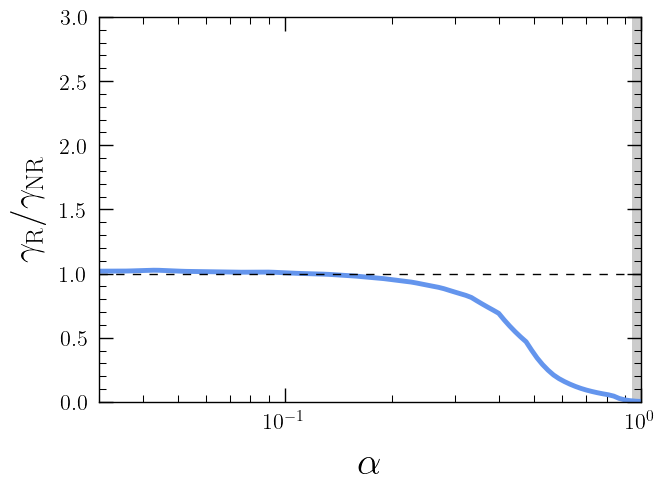

In [40]:
## 
fig, axs = plt.subplots(1, figsize=(7,5))

# loadIn = np.loadtxt("322_433_211_Inf_2.dat")
loadIn = np.loadtxt("322_433_211_Inf_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)


apts = np.logspace(np.log10(0.03), np.log10(1), 100)
ypts = 2.6e-9 * apts**8

newP = 10**intF(np.log10(apts))

# plt.plot(apts, (newP - ypts) /  ypts, lw=3.5)
plt.plot(apts, (newP ) /  ypts, lw=3.5)
plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))
# plt.plot(apts, ypts, lw=1.5, c="k", ls="--")

axs.axvspan(0.94, 2, facecolor="k", alpha=0.2)

plt.xscale("log")
plt.xlim([0.03,1])
plt.ylim([0.0, 3])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

Text(0, 0.5, '$\\gamma_{\\rm R} / \\gamma_{\\rm NR}$')

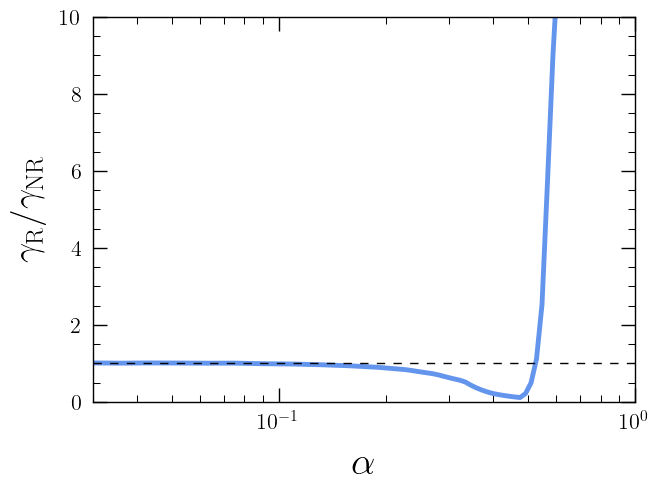

In [41]:
## 
fig, axs = plt.subplots(1, figsize=(7,5))

# loadIn = np.loadtxt("411_422_211_Inf_2.dat")
loadIn = np.loadtxt("411_422_211_Inf_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)


apts = np.logspace(np.log10(0.03), np.log10(1), 100)
ypts = 2.2e-9 * apts**8

newP = 10**intF(np.log10(apts))

# plt.plot(apts, (newP - ypts) /  ypts, lw=3.5)
plt.plot(apts, (newP ) /  ypts, lw=3.5)
plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))
# plt.plot(apts, ypts, lw=1.5, c="k", ls="--")



plt.xscale("log")
plt.xlim([0.03,1])
plt.ylim([0.0, 10])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

Text(0, 0.5, '$\\gamma_{\\rm R} / \\gamma_{\\rm NR}$')

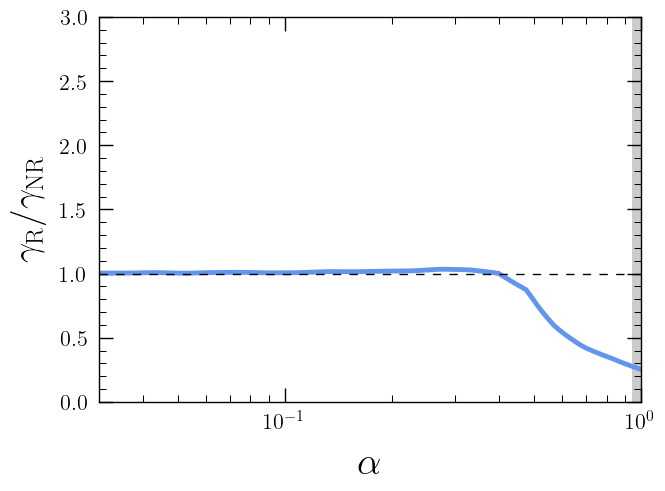

In [43]:
## 
fig, axs = plt.subplots(1, figsize=(7,5))

# loadIn = np.loadtxt("422_322_211_Inf_2.dat")
loadIn = np.loadtxt("422_322_211_Inf_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)


apts = np.logspace(np.log10(0.03), np.log10(1), 100)
ypts = 1.64e-8 * apts**8

newP = 10**intF(np.log10(apts))

# plt.plot(apts, (newP - ypts) /  ypts, lw=3.5)
plt.plot(apts, (newP ) /  ypts, lw=3.5)
plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))
# plt.plot(apts, ypts, lw=1.5, c="k", ls="--")

axs.axvspan(0.94, 2, facecolor="k", alpha=0.2)

plt.xscale("log")
plt.xlim([0.03,1])
plt.ylim([0.0, 3])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

Text(0, 0.5, '$\\gamma_{\\rm R} / \\gamma_{\\rm NR}$')

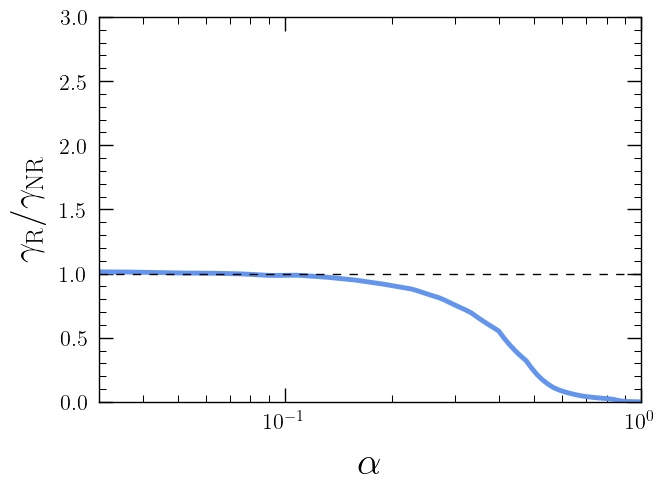

In [44]:
## 
fig, axs = plt.subplots(1, figsize=(7,5))

# loadIn = np.loadtxt("433_433_211_Inf_2.dat")
loadIn = np.loadtxt("433_433_211_Inf_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)


apts = np.logspace(np.log10(0.03), np.log10(1), 100)
ypts = 9.2e-11 * apts**8

newP = 10**intF(np.log10(apts))

# plt.plot(apts, (newP - ypts) /  ypts, lw=3.5)
plt.plot(apts, (newP ) /  ypts, lw=3.5)
plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))
# plt.plot(apts, ypts, lw=1.5, c="k", ls="--")


plt.xscale("log")
plt.xlim([0.03,1])
plt.ylim([0.0, 3])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

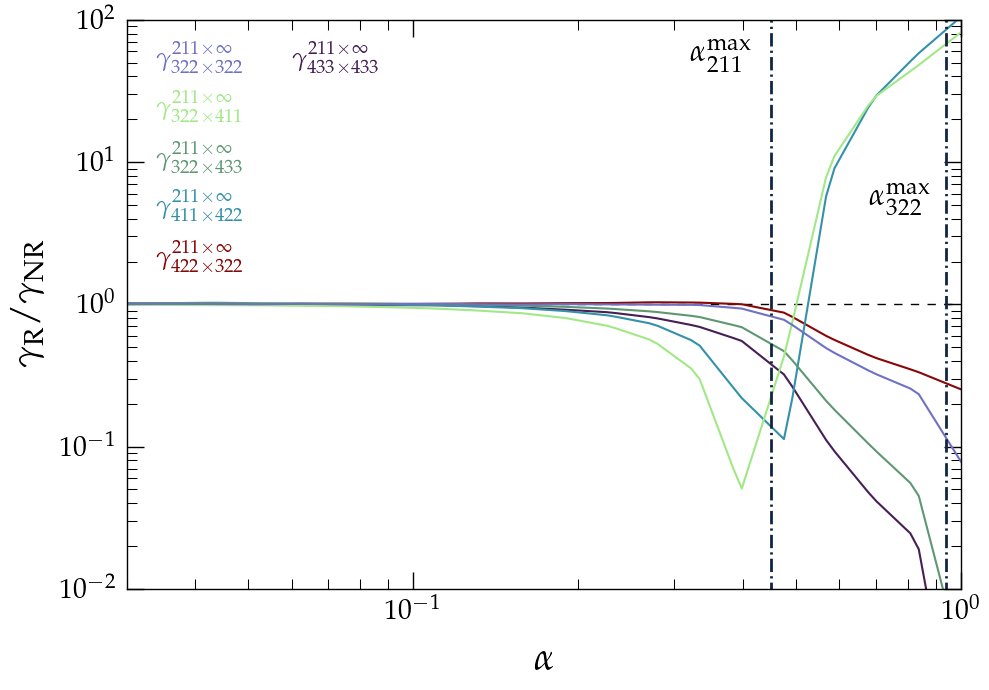

In [190]:
## 
fig, axs = plt.subplots(1, figsize=(10,7))
apts = np.logspace(np.log10(0.03), np.log10(1), 100)
plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))

lw=1.5
colorL = ["#451F55", "#880707", "#3491A9", "#5D9873", "#A1E887", "#6E71C4", "#393A10"]

loadIn = np.loadtxt("433_433_211_Inf_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 9.2e-11 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[0], lw=lw)


loadIn = np.loadtxt("422_322_211_Inf_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.64e-8 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[1], lw=lw)


loadIn = np.loadtxt("411_422_211_Inf_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.2e-9 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[2], lw=lw)


loadIn = np.loadtxt("322_433_211_Inf_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.6e-9 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[3], lw=lw)

loadIn = np.loadtxt("322_411_211_Inf_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 3.8e-9 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[4],lw=lw)



loadIn = np.loadtxt("322_322_211_Inf_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.15e-8 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[5], lw=lw)


refTop = 10**np.log10(50)
refDif = -0.35
plt.text(0.034, refTop, r"$\boldmath \gamma_{322\times 322}^{211 \times \infty}$", fontsize=18, color=colorL[5])
plt.text(0.034, refTop*10**(refDif), r"$\boldmath \gamma_{322\times 411}^{211 \times \infty}$", fontsize=18, color=colorL[4])
plt.text(0.034, refTop*10**(2*refDif), r"$\boldmath \gamma_{322\times 433}^{211 \times \infty}$", fontsize=18, color=colorL[3])
plt.text(0.034, refTop*10**(3*refDif), r"$\boldmath \gamma_{411 \times 422}^{211 \times \infty}$", fontsize=18, color=colorL[2])
plt.text(0.034, refTop*10**(4*refDif), r"$\boldmath \gamma_{422 \times 322}^{211 \times \infty}$", fontsize=18, color=colorL[1])
plt.text(0.06, refTop, r"$\boldmath \gamma_{433 \times 433}^{211 \times \infty}$", fontsize=18, color=colorL[0])



plt.vlines(0.94, 0, 1e5, ls="dashdot", color="#102542", lw=2)
plt.vlines(0.45, 0, 1e5, ls="dashdot", color="#102542", lw=2)

plt.text( 0.32, 50, r"$\alpha^{\rm max}_{211}$", rotation=0, fontsize=22)
plt.text( 0.68, 5, r"$\alpha^{\rm max}_{322}$", rotation=0, fontsize=22)


plt.xscale("log")
plt.yscale("log")
plt.xlim([0.03,1])
plt.ylim([0.01, 100])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

plt.tight_layout()
plt.savefig("../plts/Rates_Inf_n4.pdf", dpi=200)

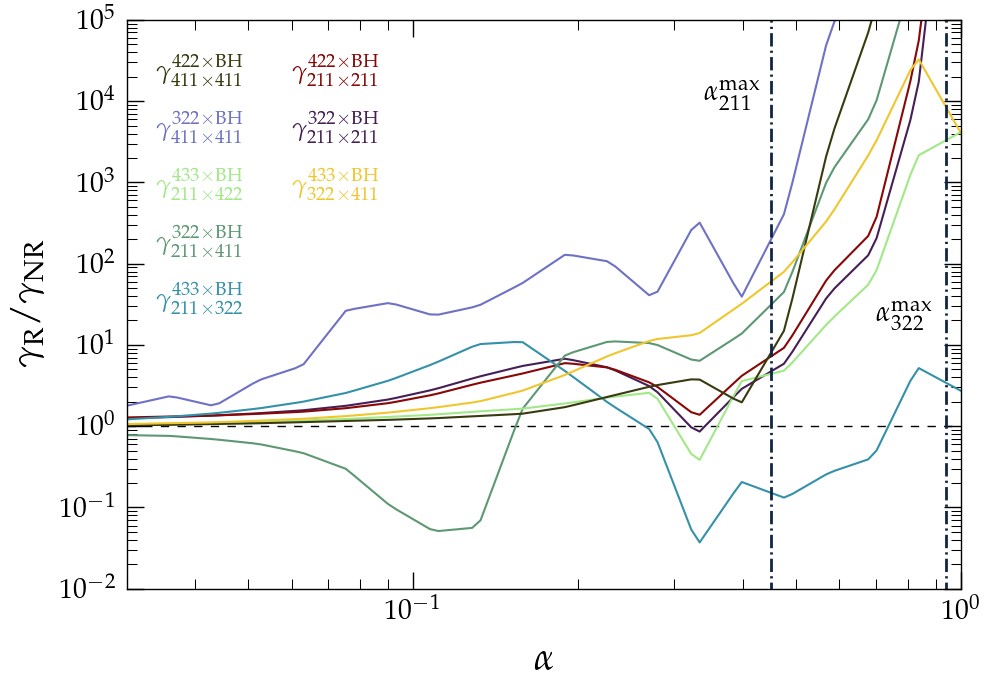

In [5]:
## 
fig, axs = plt.subplots(1, figsize=(10,7))
apts = np.logspace(np.log10(0.03), np.log10(1), 100)
plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))

lw=1.5
colorL = ["#451F55", "#880707", "#3491A9", "#5D9873", "#A1E887", "#6E71C4", "#393A10", "#F0C62D"]

loadIn = np.loadtxt("211_211_322_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 4.3e-7 * apts**11 * np.sqrt(1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[0], lw=lw)


loadIn = np.loadtxt("211_211_422_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.5e-7 * apts**11 * np.sqrt(1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[1], lw=lw)

loadIn = np.loadtxt("211_322_433_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 9.1e-8 * apts**11 * (1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[2], lw=lw)

loadIn = np.loadtxt("211_411_322_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.5e-8 * apts**11 * (1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[3], lw=lw)


loadIn = np.loadtxt("211_422_433_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 7.83e-11 * apts**7 * (1 + np.sqrt(1 - 0.9**2)) 
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[4], lw=lw)

loadIn = np.loadtxt("411_411_322_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.7e-11 * apts**11 * (1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[5], lw=lw)



loadIn = np.loadtxt("411_411_422_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.2e-11 * apts**7 * (1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[6], lw=lw)


loadIn = np.loadtxt("322_411_433_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 3.8e-11 * apts**7 * (1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[7], lw=lw)


#axs.axvspan(0.94, 2, facecolor="k", alpha=0.1)
#axs.axvspan(0.45, 2, facecolor="k", alpha=0.1)
plt.vlines(0.94, 0, 1e5, ls="dashdot", color="#102542", lw=2)
plt.vlines(0.45, 0, 1e5, ls="dashdot", color="#102542", lw=2)

plt.text( 0.34, 1e4, r"$\alpha^{\rm max}_{211}$", rotation=0, fontsize=20)
plt.text( 0.7, 20, r"$\alpha^{\rm max}_{322}$", rotation=0, fontsize=20)


refTop = 10**np.log10(2e4)
refDif = -0.7
plt.text(0.034, refTop, r"$\boldmath \gamma_{411\times 411}^{422 \times {\rm BH}}$", fontsize=18, color=colorL[6])
plt.text(0.034, refTop*10**(refDif), r"$\boldmath \gamma_{411\times 411}^{322 \times {\rm BH}}$", fontsize=18, color=colorL[5])
plt.text(0.034, refTop*10**(2*refDif), r"$\boldmath \gamma_{211\times 422}^{433 \times {\rm BH}}$", fontsize=18, color=colorL[4])
plt.text(0.034, refTop*10**(3*refDif), r"$\boldmath \gamma_{211\times 411}^{322 \times {\rm BH}}$", fontsize=18, color=colorL[3])
plt.text(0.034, refTop*10**(4*refDif), r"$\boldmath \gamma_{211\times 322}^{433 \times {\rm BH}}$", fontsize=18, color=colorL[2])
plt.text(0.06, refTop, r"$\boldmath \gamma_{211\times 211}^{422 \times {\rm BH}}$", fontsize=18, color=colorL[1])
plt.text(0.06, refTop*10**(refDif), r"$\boldmath \gamma_{211\times 211}^{322 \times {\rm BH}}$", fontsize=18, color=colorL[0])
plt.text(0.06, refTop*10**(2*refDif), r"$\boldmath \gamma_{322\times 411}^{433 \times {\rm BH}}$", fontsize=18, color=colorL[7])




plt.xscale("log")
plt.yscale("log")
plt.xlim([0.03,1])
plt.ylim([0.01, 1e5])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

plt.tight_layout()
plt.savefig("../plts/Rates_BH_n4.pdf", dpi=200)

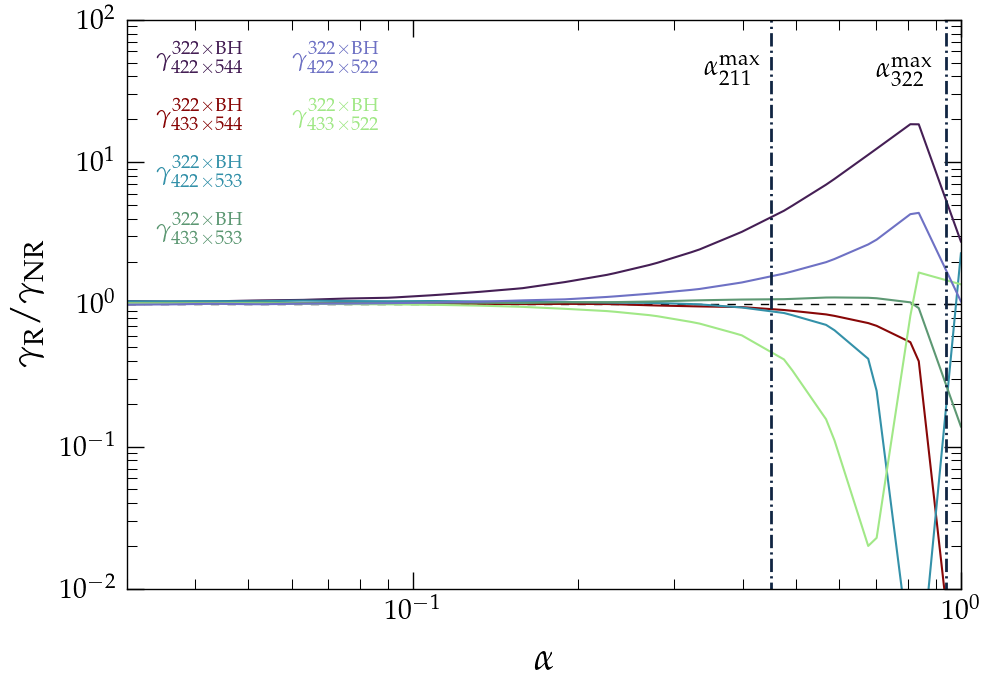

In [50]:
## 
fig, axs = plt.subplots(1, figsize=(10,7))
apts = np.logspace(np.log10(0.03), np.log10(1), 100)
plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))

lw=1.5
colorL = ["#451F55", "#880707", "#3491A9", "#5D9873", "#A1E887", "#6E71C4", "#393A10"]


loadIn = np.loadtxt("422_544_322_Inf_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.5e-11 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[0], lw=lw)


loadIn = np.loadtxt("433_544_322_Inf_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 7.8e-10 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[1], lw=lw)


loadIn = np.loadtxt("422_533_322_Inf_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.2e-9 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[2], lw=lw)

loadIn = np.loadtxt("433_533_322_Inf_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.8e-9 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[3], lw=lw)



loadIn = np.loadtxt("433_522_322_Inf_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 6.3e-10 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[4], lw=lw)


loadIn = np.loadtxt("422_522_322_Inf_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.6e-9 * apts**8
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[5], lw=lw)









#axs.axvspan(0.94, 2, facecolor="k", alpha=0.1)
#axs.axvspan(0.45, 2, facecolor="k", alpha=0.1)
plt.vlines(0.94, 0, 1e5, ls="dashdot", color="#102542", lw=2)
plt.vlines(0.45, 0, 1e5, ls="dashdot", color="#102542", lw=2)

plt.text( 0.34, 40, r"$\alpha^{\rm max}_{211}$", rotation=0, fontsize=20)
plt.text( 0.7, 40, r"$\alpha^{\rm max}_{322}$", rotation=0, fontsize=20)


refTop = 10**np.log10(50)
refDif = -0.4
plt.text(0.034, refTop, r"$\boldmath \gamma_{422\times 544}^{322 \times {\rm BH}}$", fontsize=18, color=colorL[0])
plt.text(0.034, refTop*10**(refDif), r"$\boldmath \gamma_{433\times 544}^{322 \times {\rm BH}}$", fontsize=18, color=colorL[1])
plt.text(0.034, refTop*10**(2*refDif), r"$\boldmath \gamma_{422 \times 533}^{322 \times {\rm BH}}$", fontsize=18, color=colorL[2])
plt.text(0.034, refTop*10**(3*refDif), r"$\boldmath \gamma_{433 \times 533}^{322 \times {\rm BH}}$", fontsize=18, color=colorL[3])
plt.text(0.06, refTop*10**(1*refDif), r"$\boldmath \gamma_{433\times 522}^{322 \times {\rm BH}}$", fontsize=18, color=colorL[4])
plt.text(0.06, refTop, r"$\boldmath \gamma_{422\times 522}^{322 \times {\rm BH}}$", fontsize=18, color=colorL[5])
#plt.text(0.06, refTop*10**(refDif), r"$\boldmath \gamma_{211\times 211}^{322 \times {\rm BH}}$", fontsize=18, color=colorL[0])




plt.xscale("log")
plt.yscale("log")
plt.xlim([0.03,1])
plt.ylim([0.01, 1e2])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

plt.tight_layout()
plt.savefig("../plts/Rates_Inf_n5.pdf", dpi=200)

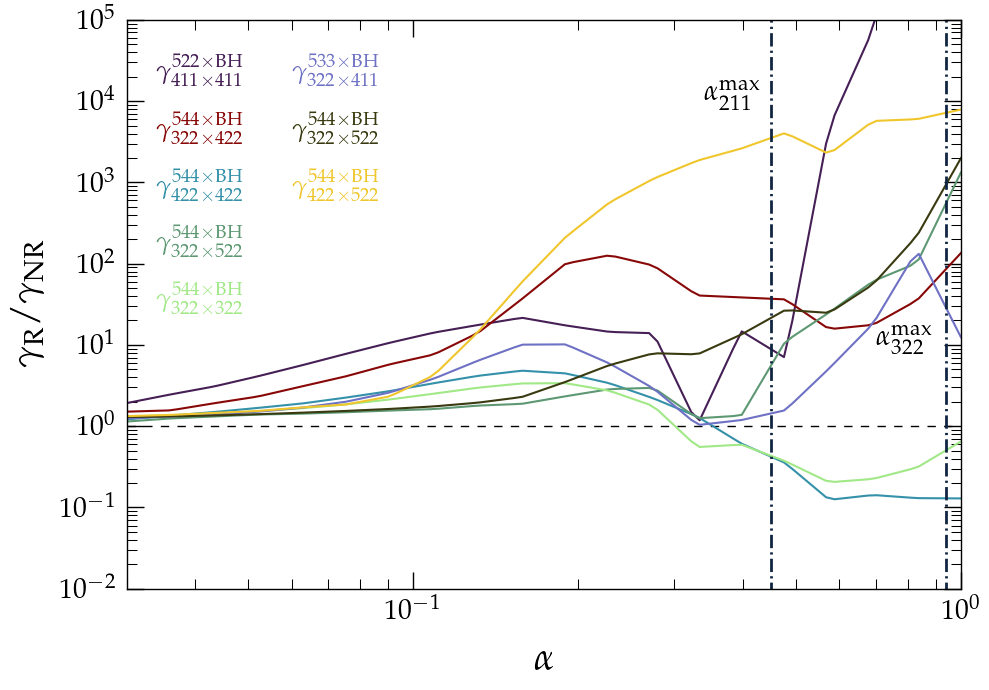

In [51]:
## 
fig, axs = plt.subplots(1, figsize=(10,7))
apts = np.logspace(np.log10(0.03), np.log10(1), 100)
plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))

lw=1.5
colorL = ["#451F55", "#880707", "#3491A9", "#5D9873", "#A1E887", "#6E71C4", "#393A10", "#F0C62D"]

loadIn = np.loadtxt("411_411_522_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 9.0e-11 * apts**11 * np.sqrt(1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[0], lw=lw)

# loadIn = np.loadtxt("422_322_544_BH_NR.dat")
loadIn = np.loadtxt("322_422_544_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
# ypts = 1.22e-11  * apts**11 * np.sqrt(1 + np.sqrt(1 - 0.9**2))
ypts = 6.88e-11  * apts**11 * np.sqrt(1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[1], lw=lw)

loadIn = np.loadtxt("422_422_544_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.3e-9  * apts**11 * np.sqrt(1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[2], lw=lw)


loadIn = np.loadtxt("522_522_544_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.7e-13  * apts**7 * np.sqrt(1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[3], lw=lw)




loadIn = np.loadtxt("322_322_544_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 1.9e-9  * apts**11 * np.sqrt(1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[4], lw=lw)



loadIn = np.loadtxt("322_411_533_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 2.0e-8  * apts**11 * np.sqrt(1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[5], lw=lw)


loadIn = np.loadtxt("322_522_544_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 3.4e-12  * apts**7 * np.sqrt(1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[6], lw=lw)


loadIn = np.loadtxt("422_522_544_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
ypts = 3.7e-14  * apts**7 * np.sqrt(1 + np.sqrt(1 - 0.9**2))
newP = 10**intF(np.log10(apts))
plt.plot(apts, (newP ) /  ypts, colorL[7], lw=lw)





plt.vlines(0.94, 0, 1e5, ls="dashdot", color="#102542", lw=2)
plt.vlines(0.45, 0, 1e5, ls="dashdot", color="#102542", lw=2)

plt.text( 0.34, 1e4, r"$\alpha^{\rm max}_{211}$", rotation=0, fontsize=20)
plt.text( 0.7, 10, r"$\alpha^{\rm max}_{322}$", rotation=0, fontsize=20)


refTop = 10**np.log10(2e4)
refDif = -0.7
plt.text(0.034, refTop, r"$\boldmath \gamma_{411\times 411}^{522 \times {\rm BH}}$", fontsize=18, color=colorL[0])
plt.text(0.034, refTop*10**(refDif), r"$\boldmath \gamma_{322\times 422}^{544 \times {\rm BH}}$", fontsize=18, color=colorL[1])
plt.text(0.034, refTop*10**(2*refDif), r"$\boldmath \gamma_{422\times 422}^{544 \times {\rm BH}}$", fontsize=18, color=colorL[2])
plt.text(0.034, refTop*10**(3*refDif), r"$\boldmath \gamma_{322\times 522}^{544 \times {\rm BH}}$", fontsize=18, color=colorL[3])
plt.text(0.034, refTop*10**(4*refDif), r"$\boldmath \gamma_{322\times 322}^{544 \times {\rm BH}}$", fontsize=18, color=colorL[4])

plt.text(0.06, refTop, r"$\boldmath \gamma_{322\times 411}^{533 \times {\rm BH}}$", fontsize=18, color=colorL[5])
plt.text(0.06, refTop*10**(refDif), r"$\boldmath \gamma_{322\times 522}^{544 \times {\rm BH}}$", fontsize=18, color=colorL[6])
plt.text(0.06, refTop*10**(2*refDif), r"$\boldmath \gamma_{422\times 522}^{544 \times {\rm BH}}$", fontsize=18, color=colorL[7])




plt.xscale("log")
plt.yscale("log")
plt.xlim([0.03,1])
plt.ylim([0.01, 1e5])

plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"$\gamma_{\rm R} / \gamma_{\rm NR}$", fontsize=26)

plt.tight_layout()
plt.savefig("../plts/Rates_BH_n5.pdf", dpi=200)

Text(0, 0.5, 'Test Ratio')

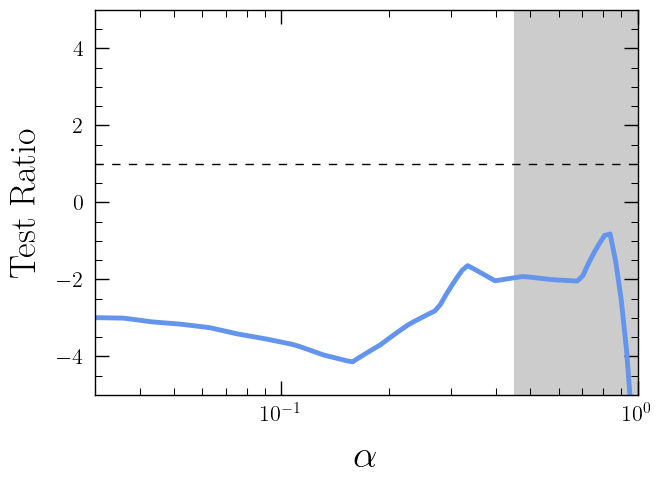

In [58]:
## 
fig, axs = plt.subplots(1, figsize=(7,5))

apts = np.logspace(np.log10(0.03), np.log10(1), 100)

loadIn = np.loadtxt("211_211_322_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
newP1 = 10**intF(np.log10(apts))

loadIn = np.loadtxt("211_211_422_BH_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
newP2 = 10**intF(np.log10(apts))

loadIn = np.loadtxt("322_322_211_Inf_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
newP3 = 10**intF(np.log10(apts))

loadIn = np.loadtxt("422_322_211_Inf_NR.dat")
intF = interp1d(np.log10(loadIn[:,0]), np.log10(loadIn[:,1]), fill_value='extrapolate', bounds_error=False)
newP4 = 10**intF(np.log10(apts))


plt.plot(apts, 1- newP4 * newP1 / (newP2 * newP3), lw=3.5)
plt.plot(apts, np.ones_like(apts), lw=1.0, c="k", dashes=(6,6))


axs.axvspan(0.45, 2, facecolor="k", alpha=0.2)

# plt.yscale("log")
plt.xscale("log")
plt.xlim([0.03,1])
plt.ylim([-5,5])
plt.xlabel(r"$\alpha$", fontsize=28)
# plt.ylabel(r"$\left( \gamma / \mu\right)_{f_a = M_{\rm pl}}$", fontsize=26)
plt.ylabel(r"Test Ratio", fontsize=26)